# Volume 3: K-Means Clustering.
    <Name>
    <Class>
    <Date>

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets, decomposition, cluster
import random
%matplotlib inline
import imageio

In [3]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$-th entry indicates which cluster center the $i$-th row of $X$ is closest to.

4. `plot()`: Accept an $l \times n$ matrix $X$ of $l$ data points and an array $y$ of $l$ integers representing the labels.
Plot each data point from the matrix, colored by cluster, along with the cluster centers.
Note that in this case, $n = 2$.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster.

In [4]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, normalize=False, p = 2):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.normalize = normalize 
        self.p = p
        self.centers = None      
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """

        # Randomly initialize cluster centers
        mean_start = X[np.random.choice(X.shape[0], size = self.n_clusters, replace = False)]
        
        broadcast_X = X[:, np.newaxis, :]
        broadcast_mean = mean_start[np.newaxis, :, :]
        
        # Do this iteration self.max_iter times
        for i in range(self.max_iter):
            
            # Find closest centers for each piece of data
            norms = np.linalg.norm(broadcast_X - broadcast_mean, axis=2, ord=self.p)
            clusters = np.argmin(norms, axis=1)
            
            # Initialize new clusters and cluster counts
            new_mean = np.zeros((self.n_clusters, X.shape[1]))
            counts_new = np.zeros(self.n_clusters)

            # Add to these clusters and cluster counts
            np.add.at(new_mean, clusters, X)
            np.add.at(counts_new, clusters, 1)

            # Find clusters that are nonzero
            zero_counts = (counts_new == 0)

            empty_clusters = np.flatnonzero(zero_counts)
            
            # Randomize the cluster centers for clusters that don't have any samples
            new_mean[empty_clusters] = X[np.random.choice(X.shape[0], size=len(empty_clusters), replace=False)]
            
            # Calculate the new means
            new_mean /= counts_new[:, np.newaxis]

            # Add a convergence check
            if np.linalg.norm(new_mean - mean_start) < self.tol:
                break

            # Normalize if called to do so
            if self.normalize:
                new_mean /= np.linalg.norm(new_mean, axis=1, keepdims=True, ord=2)
                
                
            # Make new broadcast mean
            broadcast_mean = new_mean[np.newaxis, :, :]

        # Initialize center and return self
        self.centers = new_mean 
        return self     
        
        

    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        
        # Calculate the norms
        norms = np.linalg.norm(X[:, np.newaxis, :] - self.centers, axis = 2, ord = self.p)
        
        # Find the index of the closest center for each data point
        cluster_indices = np.argmin(norms, axis = 1)
        
        return cluster_indices

            
            
    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, X, y):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        
        # Iris Colors
        if self.n_clusters == 8:
            
            colors = ['orange', 'red', 'pink', 'brown', 'lavenderblush', 'lemonchiffon', 'green', 'magenta']
        
        # Colors for Sacramento Housing Data    
        if self.n_clusters == 12:
            
            colors = ['orange', 'red', 'pink', 'brown', 'lavenderblush', 'lemonchiffon', 'green', 'magenta', 'grey', 'lime', 'lightsalmon', 'goldenrod']
        
        # Color for Earthquake Data
        if self.n_clusters == 15:
        
            colors = ['orange', 'red', 'pink', 'brown', 'lavenderblush', 'lemonchiffon', 'green', 'magenta', 'grey', 'lime', 'lightsalmon', 'goldenrod', 'chocolate', 'cyan', 'fuchsia' ]
            
    
        colors = np.array(colors)  # Convert the list of colors to a NumPy array

        x_points = X[:, 0]  # Extract all x-coordinates at once
        y_points = X[:, 1]  # Extract all y-coordinates at once

        # Use NumPy indexing to directly assign colors to points
        plt.scatter(x_points, y_points, c=colors[y])
        
        # Only do this for the non-Earthquake data functions
        if self.normalize == False:
            
            # Plot centers
            for j in range(len(self.centers)):
                
                color = colors[j]
                
                x_center = self.centers[j][0]
                y_center = self.centers[j][1]
                plt.scatter(x_center, y_center, color = 'black', marker = 'x', zorder = 2)
            
    
        
        
                                  

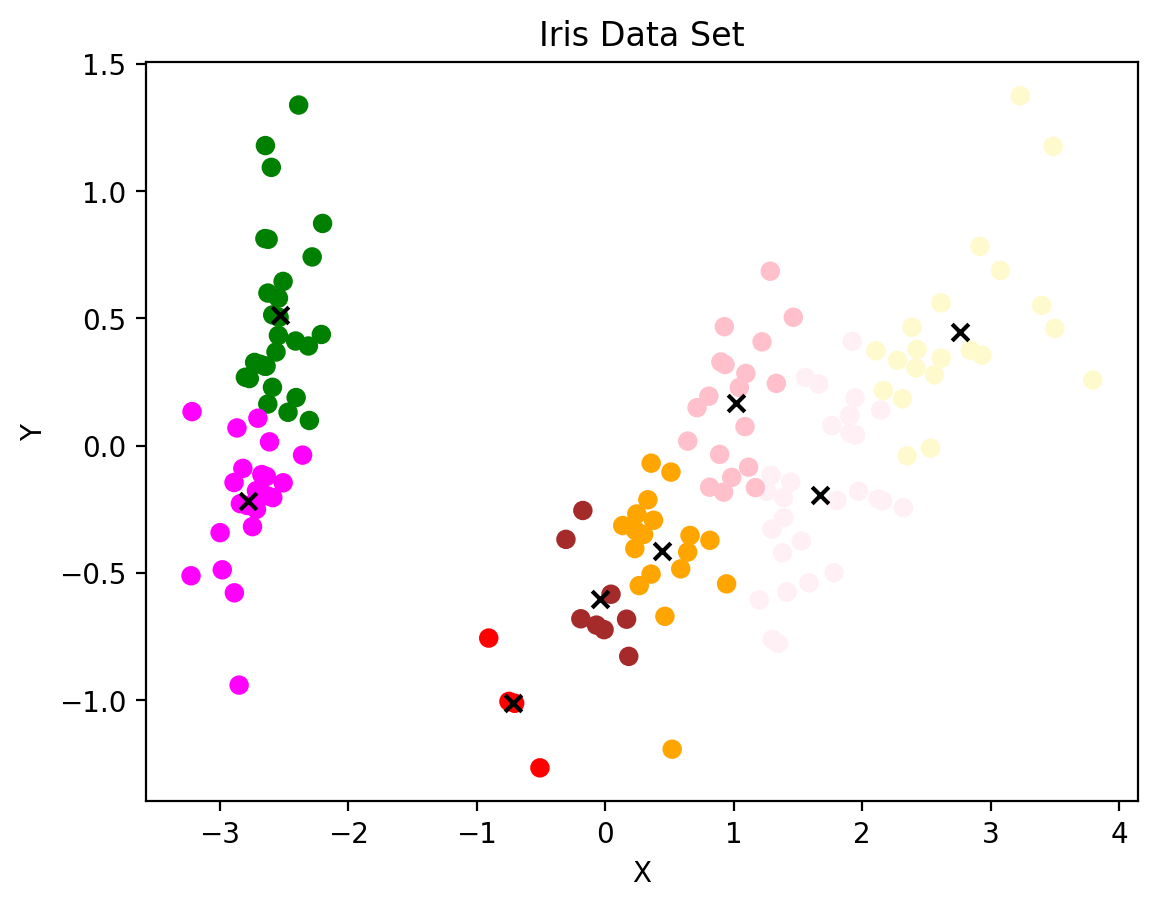

In [5]:
# Load in iris data
iris = datasets.load_iris()
reduced_data = decomposition.PCA(n_components= 2).fit_transform(iris.data)


# Set up the K-means algorithm
iris_KMeans = KMeans()
labels = iris_KMeans.fit_predict(reduced_data)


# Plot the data
plt.title('Iris Data Set')
plt.xlabel('X')
plt.ylabel('Y')
iris_KMeans.plot(reduced_data, labels)
plt.show()


## Problem 2
Using the Methods you wrote in Problem 1, add a parameter, $p$, to your class that denotes the norm and defaults to 2.
Save p as an attribute to be used in your fit() and predict() functions.
Using the latitude and longitude data in $\text{sacramento.npy}$ find the optimal placement for 12 fire stations. 
Plot the longitude and latitudes, the centers, and color them by cluster.
Make plots for different values for $p$ to find the optimal locations for the fire stations.
In a Markdown cell report which norm was the best at keeping the maximum distance small.

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_20024/3787902908.py:55: RuntimeWarning: divide by zero encountered in divide
  new_mean /= counts_new[:, np.newaxis]


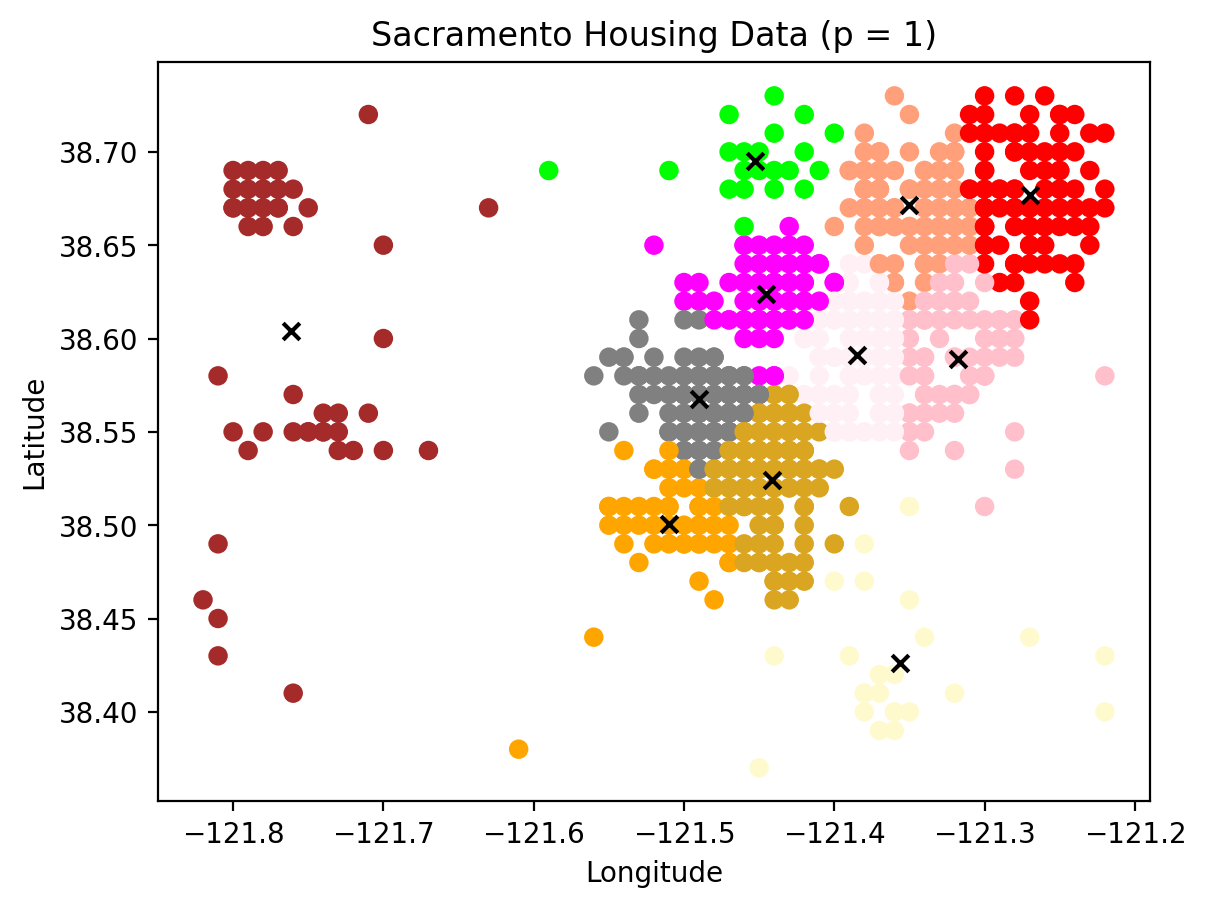

In [6]:
# Load in latitude and longitude data
sacramento_data = np.load('sacramento.npy')
lat_long = sacramento_data[:,-2:]
lat_long = lat_long[:,::-1]

# Use the 1-norm
sacramento_KMeans_1 = KMeans(n_clusters=12, p = 1)
labels = sacramento_KMeans_1.fit_predict(lat_long)

# Plot data
plt.title("Sacramento Housing Data (p = 1)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sacramento_KMeans_1.plot(lat_long, labels)
plt.show()


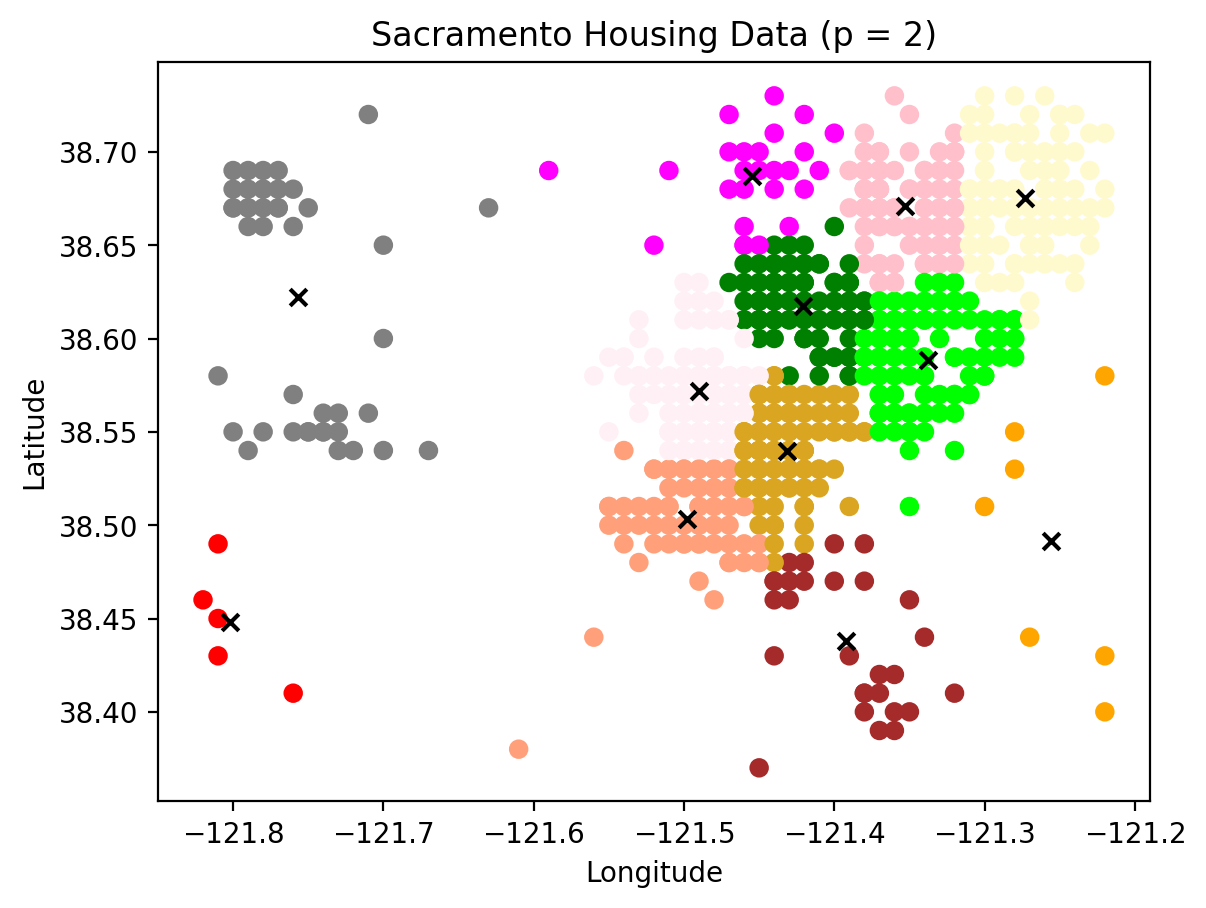

In [7]:
# Use the 2-norm
sacramento_KMeans_2 = KMeans(n_clusters=12, p = 2)
labels = sacramento_KMeans_2.fit_predict(lat_long)

# Plot the data
plt.title("Sacramento Housing Data (p = 2)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sacramento_KMeans_2.plot(lat_long, labels)
plt.show()

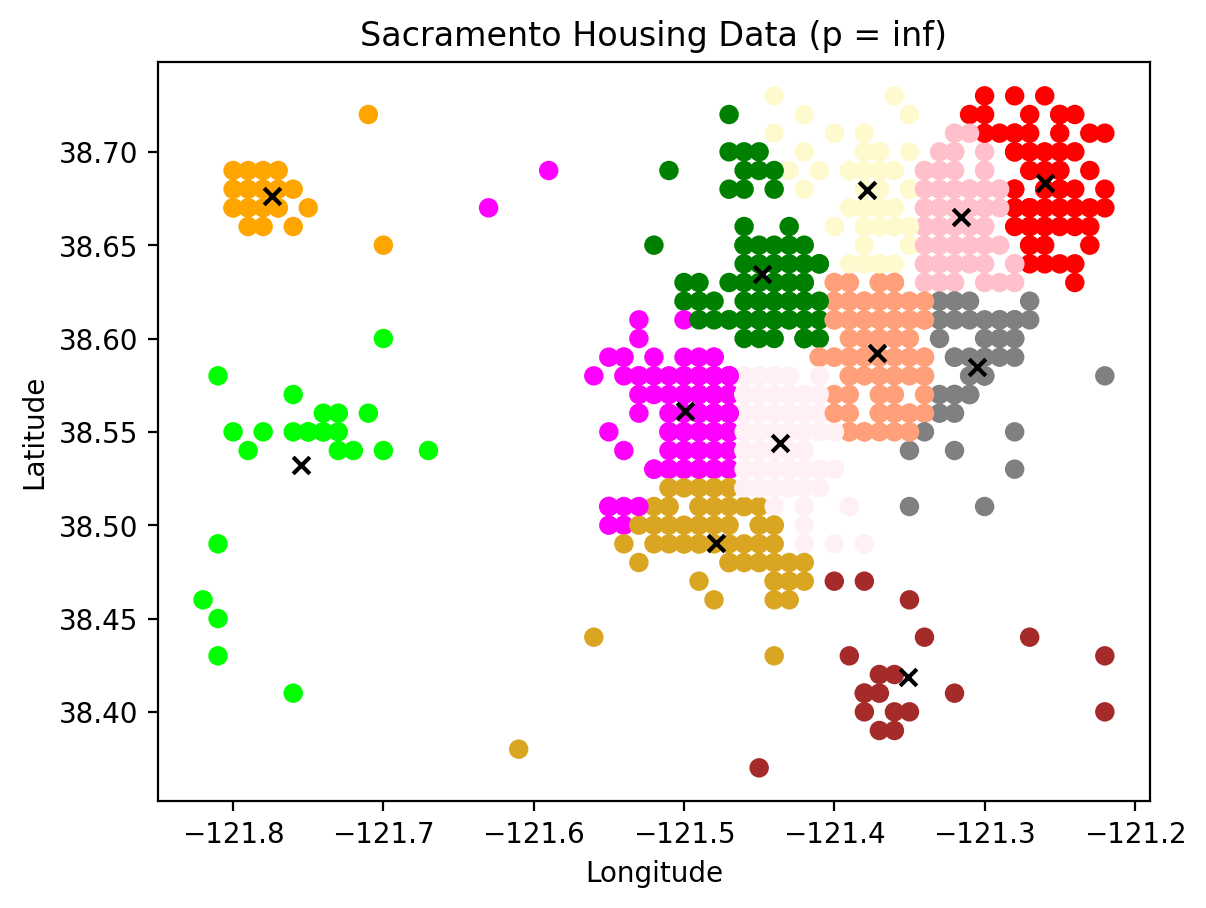

In [8]:
# Use the inf-norm
sacramento_KMeans_inf = KMeans(n_clusters=12, p = np.inf)
labels = sacramento_KMeans_inf.fit_predict(lat_long)


plt.title("Sacramento Housing Data (p = inf)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sacramento_KMeans_inf.plot(lat_long, labels)
plt.show()

The norm that was the best at keeping the maximum distance small was the infinity norm.

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

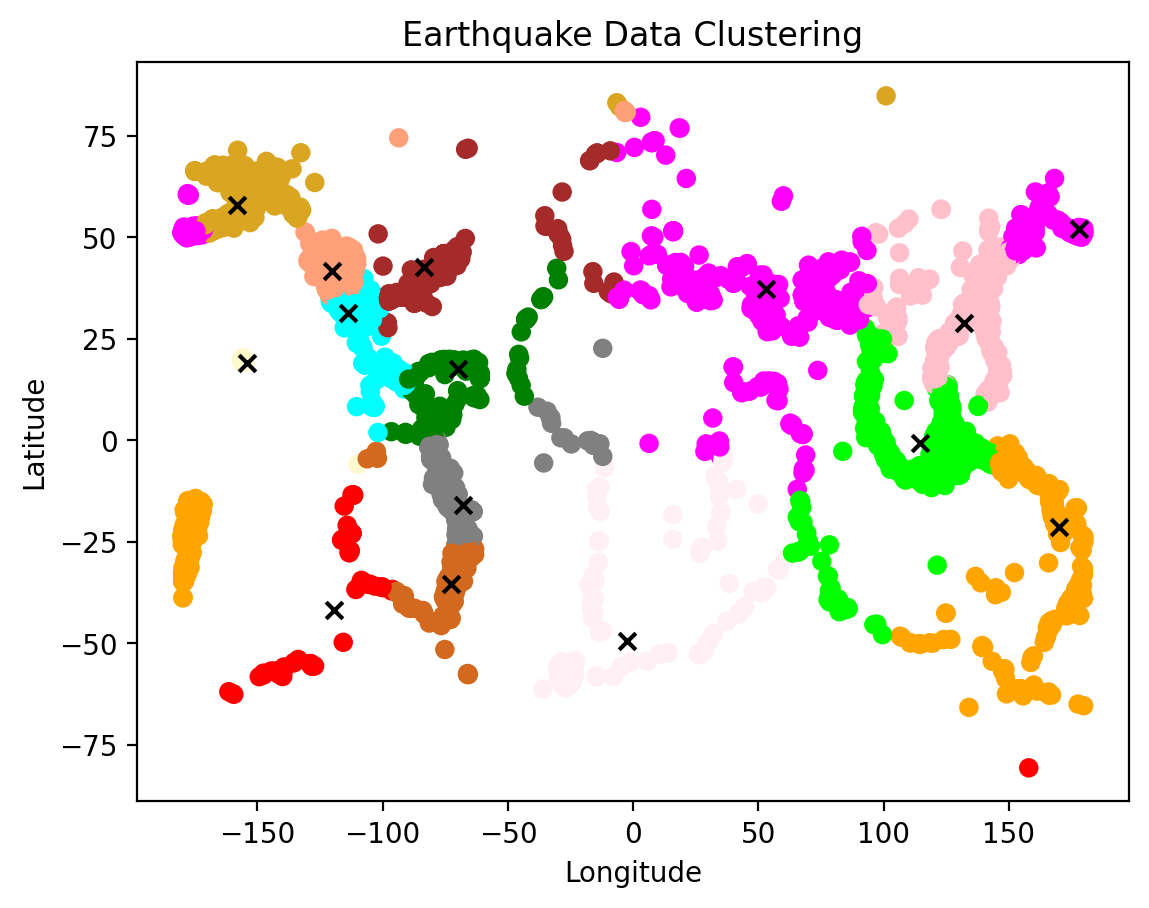

In [9]:
# Load in the earthquake data
earthquake_data = np.load('earthquake_coordinates.npy')

# Pull out latitude and longitude data
long = earthquake_data[:, 0]
lat = earthquake_data[:, 1]

graph_data = np.column_stack((long,lat))

# Convert to radians (spherical coordinates)
lat_rad = np.deg2rad(90 - lat)
long_rad = np.deg2rad(long)

# Convert to Euclidean coordinates
x = 1 * (np.sin(lat_rad)) * (np.cos(long_rad))
y = 1 * (np.sin(lat_rad)) * (np.sin(long_rad))
z = 1 * (np.cos(lat_rad))

euclidean_data = np.column_stack((x, y, z))

# Initialize the KMeans model with the desired number of clusters
earthquake_KMeans = KMeans(n_clusters=15, normalize=True, p = np.inf)

# Fit the KMeans model to the Euclidean data
labels =  earthquake_KMeans.fit_predict(euclidean_data)


# Create a scatter plot of the earthquake data colored by cluster
earthquake_KMeans.plot(graph_data, labels)

# Convert centers into longitude and latitude coordinates
centers = earthquake_KMeans.centers
center_x, center_y, center_z = centers.T
phi = np.arccos(center_z)
theta = np.arctan2(center_y, center_x)
long_centers = np.degrees(theta)
lat_centers = -180/np.pi * (phi - np.pi/2)

# Plot the data
plt.scatter(long_centers, lat_centers, color = 'black', marker = 'x', zorder = 2)
plt.title('Earthquake Data Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [10]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    
    # Reshape the image 
    m,n,y = im.shape
    im_reshaped = np.reshape(im, (m*n,3))
    
    # Get random samples
    samples = np.array([im_reshaped[np.random.randint(0, im_reshaped.shape[0] -1 )] for i in range(n_samples)])
    
    # Initialize the KMeans model with the desired number of clusters
    kmeans = cluster.KMeans(n_clusters = n_clusters)
    
    # Find color centers based off of these samples
    kmeans.fit(samples)
    centers = kmeans.cluster_centers_
    center_labels = kmeans.predict(im_reshaped)
    
    # Make color values for each individual point in the picture
    new_centers = [centers[center_labels[i]] for i in range(im_reshaped.shape[0])]
    
    # Return quantized image
    return np.reshape(np.array(new_centers), (m,n,y)).astype(int)
    
    
    
    
    
    
    
    
    
    

    
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


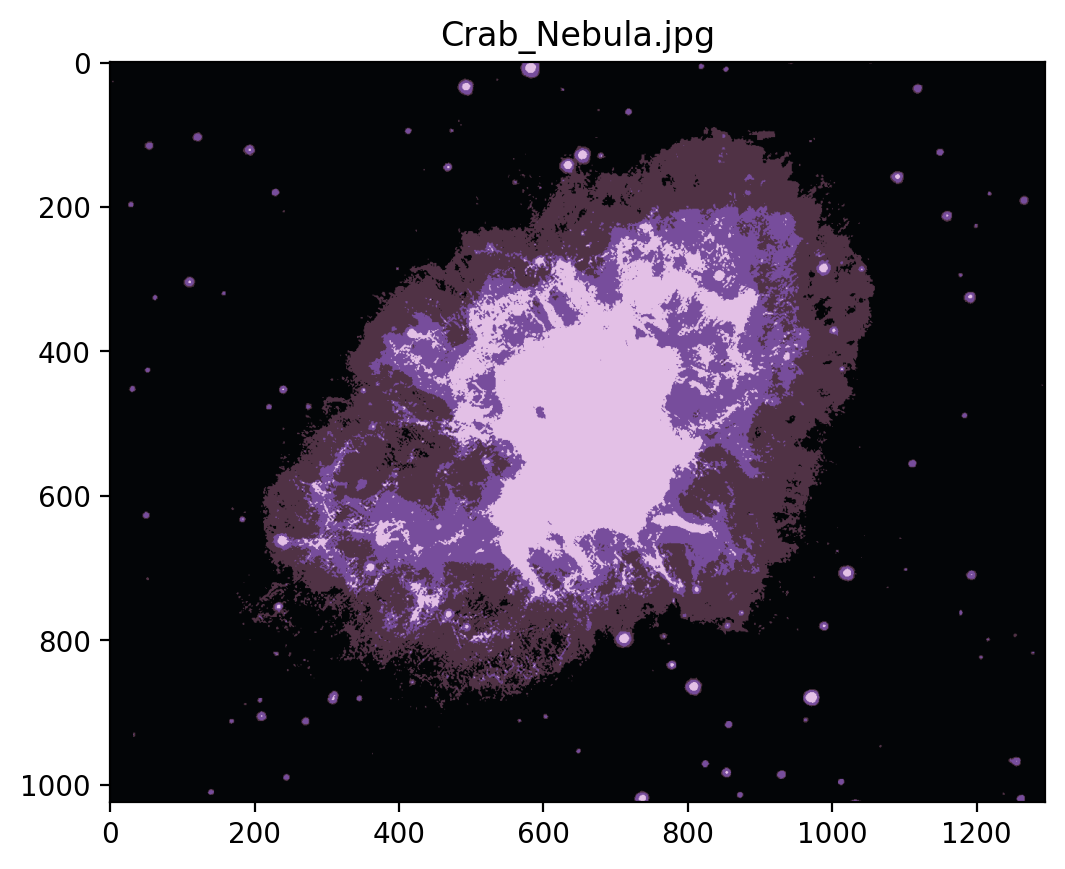

In [11]:
image_1 = plt.imread('crab_nebula.jpg')

plt.title("Crab_Nebula.jpg")
plt.imshow(quantize_image(image_1))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


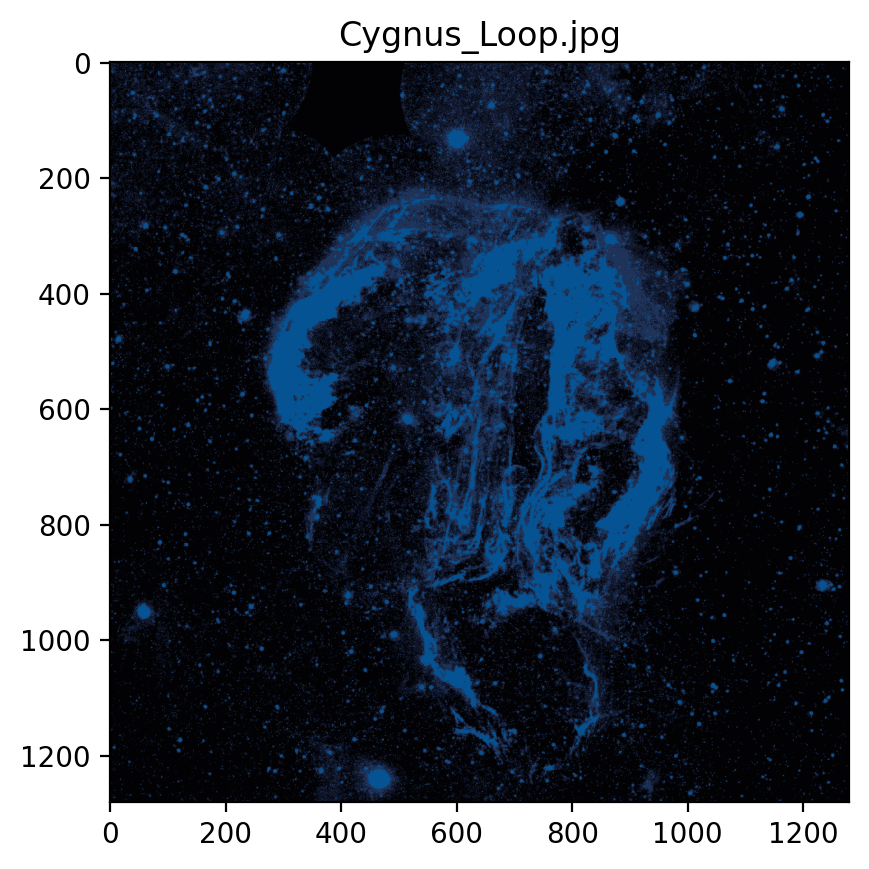

In [12]:
image_2 = plt.imread('cygnus_loop.jpg')

plt.title('Cygnus_Loop.jpg')
plt.imshow(quantize_image(image_2))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


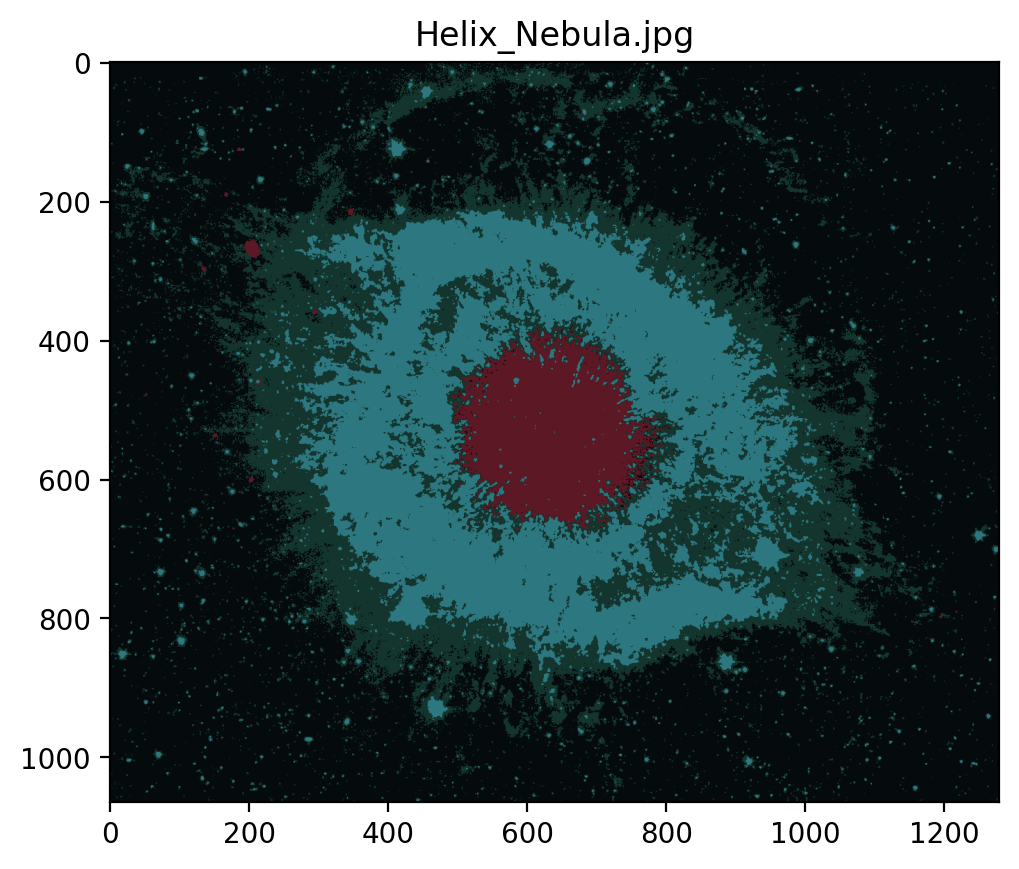

In [13]:
image_3 = plt.imread('helix_nebula.jpg')

plt.title('Helix_Nebula.jpg')
plt.imshow(quantize_image(image_3))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


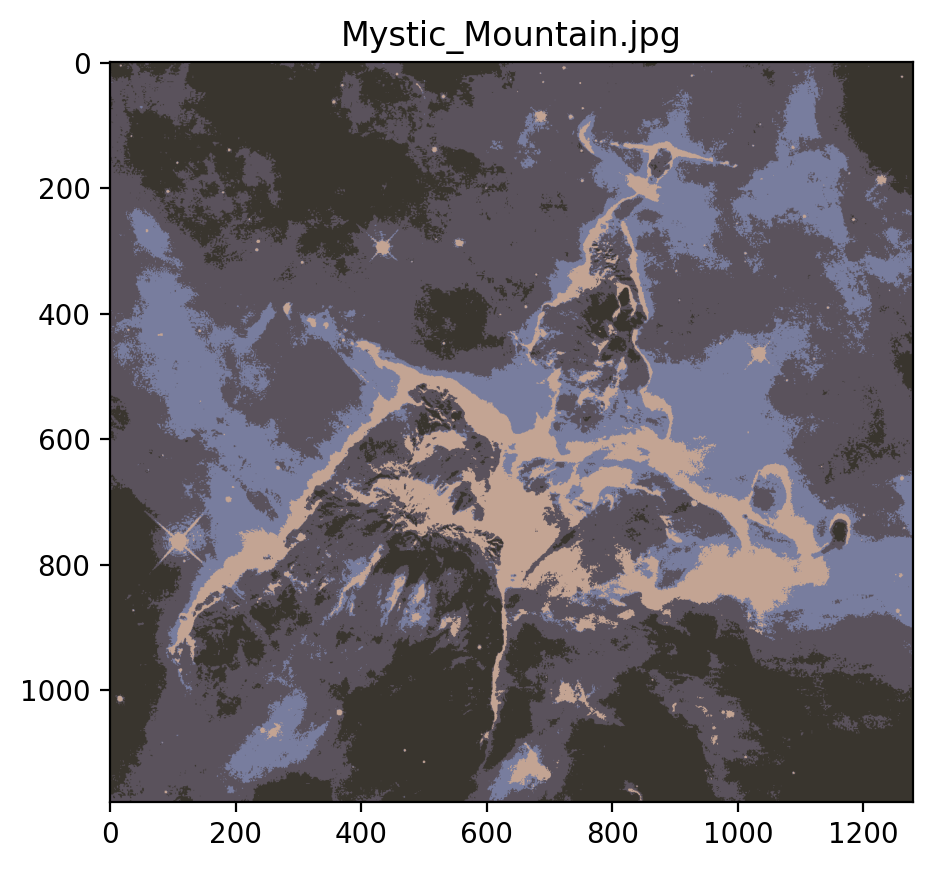

In [14]:
image_4 = plt.imread('mystic_mountain.jpg')

plt.title('Mystic_Mountain.jpg')
plt.imshow(quantize_image(image_4))